# PROJET 6 :  DÉTECTER DES FAUX BILLETS


### CONTEXTE
- Lutte contre la criminalité organisée, à l'Office central pour la répression du faux monnayage. 
- Mission : créer un algorithme de détection de faux billets.

### OBJECTIFS : 
- Effectuer une analyse de statistique descriptive
- Effectuer une analyse en composantes principales
- Effectuer une classification automatique, et une modélisation de type régression logistique.

## Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from kneed import KneeLocator
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('mode.use_inf_as_na', True)

In [2]:
import os
os.getcwd()


'/Users/mouniamfoungoulie/Documents/Openclassrooms-Dataanalyst/Projet 6/Script'

## Données

In [3]:
#Import fichier 
notes = pd.read_csv("../Data/notes.csv")
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [4]:
print(notes.shape)
notes.head()

(170, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [5]:
notes.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [6]:
notes["is_genuine"].value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

Text(0, 0.5, 'Total')

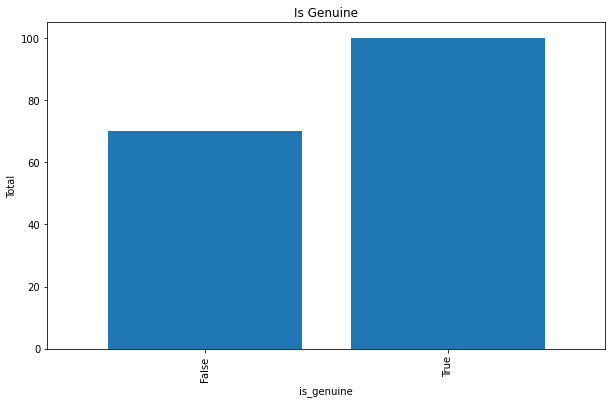

In [7]:
isgenuine = notes.groupby('is_genuine').size()
plt.figure(figsize=(10,6))
isgenuine.plot(kind='bar', title='Is Genuine', width=0.8)
plt.ylabel('Total')

In [8]:
#moyennes des variables 
notes.groupby(by='is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
True,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


Analyse: 
- La moyenne de la variable margin_low est importante lorsque le billet est faux. 
- La moyenne de la variable length est elevée pour les vrais billets

## I - DESCRIPTION & ANALYSE STATISTIQUE

array([[<AxesSubplot:title={'center':'length'}>]], dtype=object)

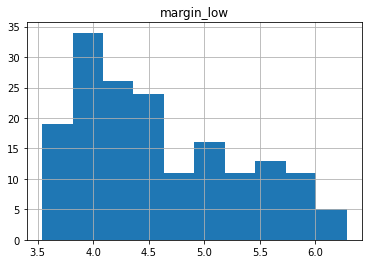

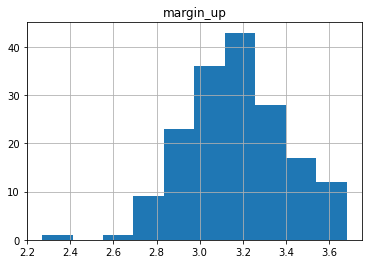

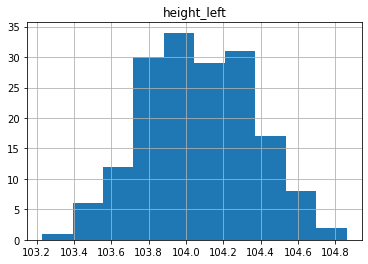

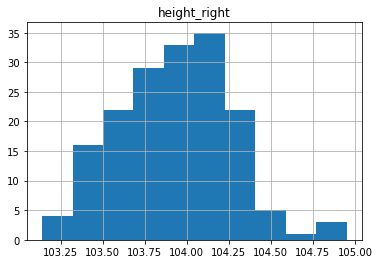

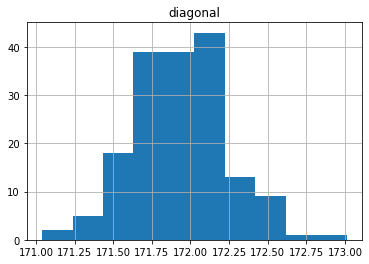

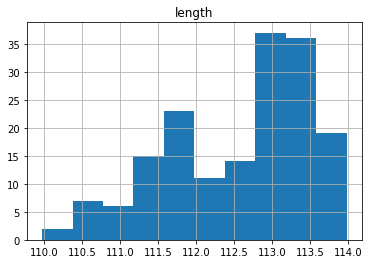

In [9]:
#Distribution des variables
notes[['margin_low']].hist(bins = 10)
notes[['margin_up']].hist(bins = 10)
notes[['height_left']].hist(bins = 10)
notes[['height_right']].hist(bins = 10)
notes[['diagonal']].hist(bins = 10)
notes[['length']].hist(bins = 10)

### Pairwise correlation : Etude des dépendences entre plusieurs variables 

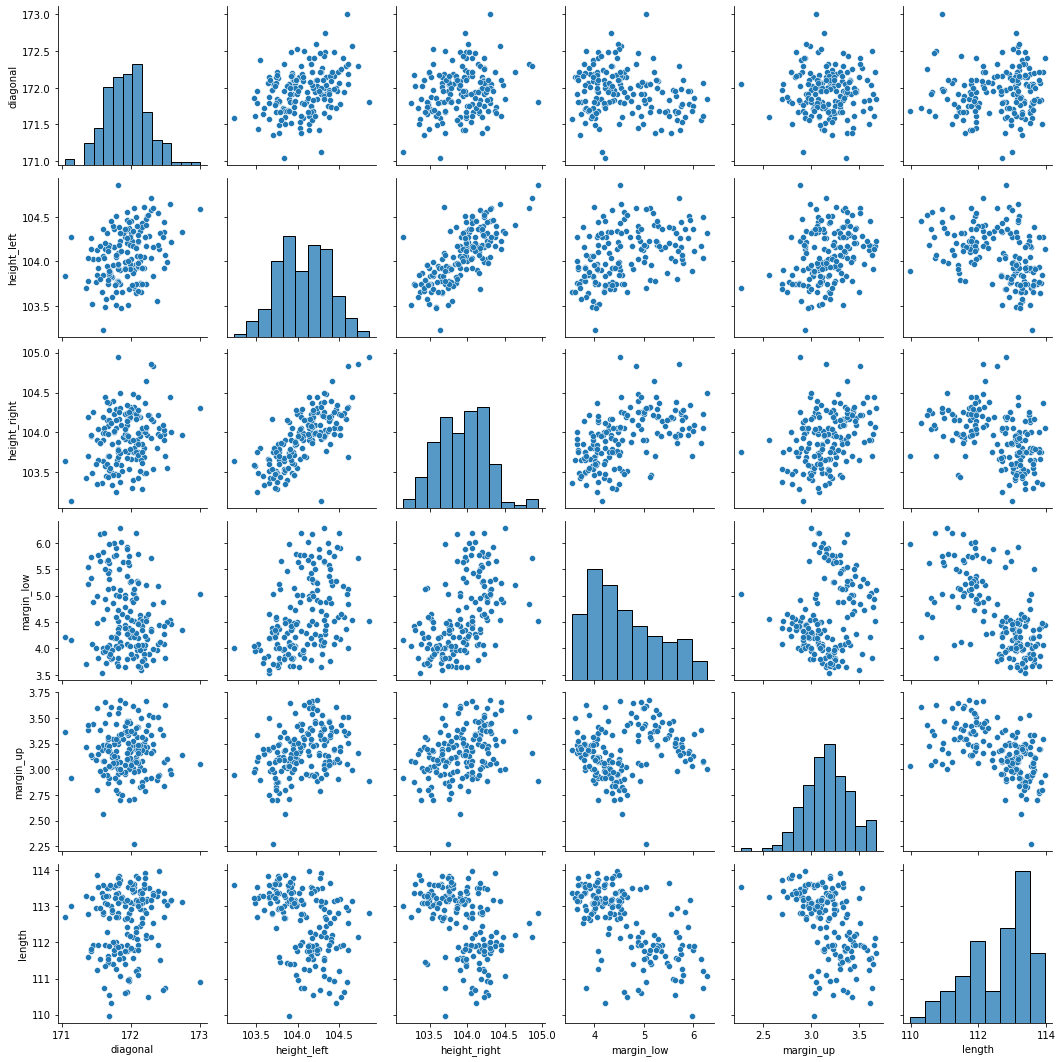

In [10]:
import seaborn as sns
sns.pairplot(notes[['diagonal','height_left','height_right','margin_low', 'margin_up', 'length']], diag_kind='hist')

Anlayse: correlation positive entre les variables height_left et height_right

### 1- Analyse statistique inferentielle

### a-  QQ plot
- diagramme Q-Q (quantile-quantile) est un diagramme permettant de comparer deux distributions de probabilité en traçant leurs quantiles l'un par rapport à l'autre. 
- Si les deux distributions comparées sont similaires, les points du graphique Q-Q se situeront approximativement sur la ligne y = x.

/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/envs/projet_6/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly 

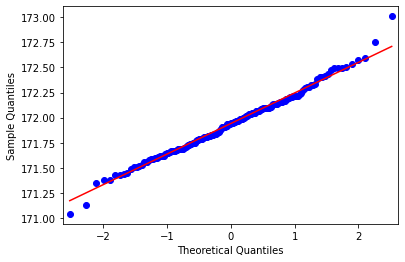

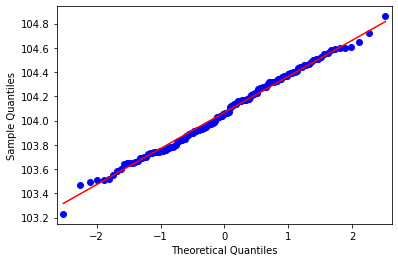

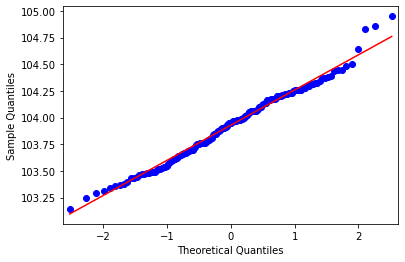

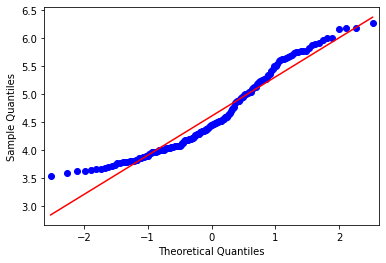

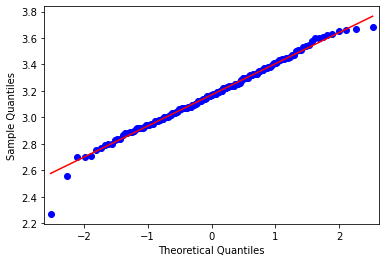

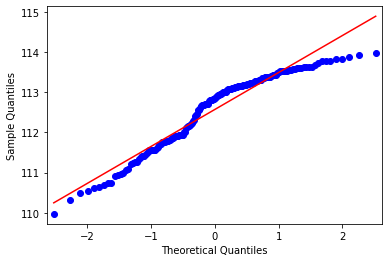

In [11]:
import statsmodels.api as sm

fig = sm.qqplot(notes['diagonal'], line ='s')
fig = sm.qqplot(notes['height_left'], line='s')
fig = sm.qqplot(notes['height_right'], line='s')
fig = sm.qqplot(notes['margin_low'], line='s')
fig = sm.qqplot(notes['margin_up'], line='s')
fig = sm.qqplot(notes['length'], line='s')
plt.show()

Analyse : les variables margin_low et length ne suivent pas une loi normale.

### b- Test de normalité

- loi normale: distribution normale, définit une représentation de données selon laquelle la plupart des valeurs sont regroupées autour de la moyenne et les autres s'en écartent symétriquement des deux côtés.

In [12]:
# Shapiro-Wilk Test 
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# Shapiro-Wilk Test
from scipy.stats import shapiro

print('Shapiro test')
print( )
for column in ['height_left', 'diagonal', 'height_right',
               'height_right', 'margin_low',
               'margin_up', 'length']:
    print(column)
    stat, p = shapiro(notes[column])

    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print( )

Shapiro test

height_left
Statistics=0.993, p=0.553
Sample looks Gaussian (fail to reject H0)

diagonal
Statistics=0.993, p=0.611
Sample looks Gaussian (fail to reject H0)

height_right
Statistics=0.988, p=0.163
Sample looks Gaussian (fail to reject H0)

height_right
Statistics=0.988, p=0.163
Sample looks Gaussian (fail to reject H0)

margin_low
Statistics=0.935, p=0.000
Sample does not look Gaussian (reject H0)

margin_up
Statistics=0.989, p=0.204
Sample looks Gaussian (fail to reject H0)

length
Statistics=0.932, p=0.000
Sample does not look Gaussian (reject H0)




### Analyse

Les tests supposent que l'échantillon a été tiré d'une distribution gaussienne. Techniquement, cela s'appelle l'hypothèse nulle, ou H0. On choisit un niveau seuil appelé alpha, généralement 5 % (ou 0,05), qui est utilisé pour interpréter la valeur p.

- p <= alpha : rejeter H0, non normal.
- p > alpha : ne rejette pas H0, normal.

Cela signifie qu'en général, nous cherchons des résultats avec une valeur p plus grande pour confirmer que notre échantillon a probablement été tiré d'une distribution gaussienne.

Dans notre cas les resultats des tests montrent que dans la data notes,  seuls les variables:  length et margin_low ne suivent pas une loi normale.

### 2- Analyse des correlations entre variables

In [13]:
#Remplacer valeurs nulles par 0
notes = notes.fillna(0)
print(notes.shape)

(170, 7)


<AxesSubplot:>

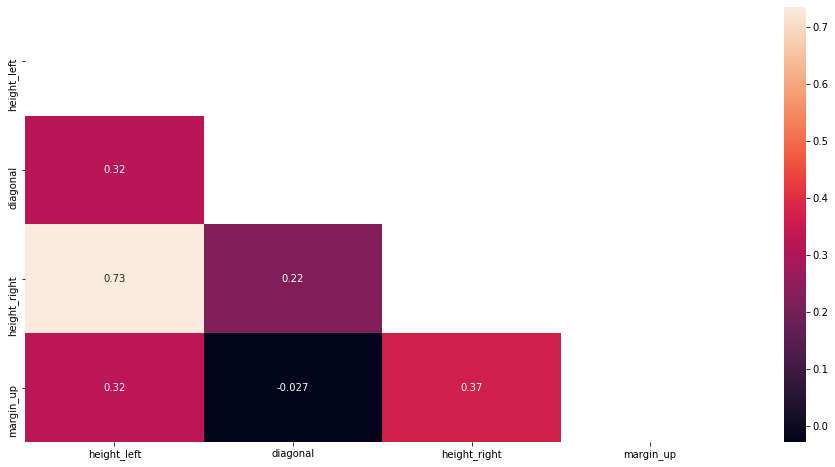

In [14]:
#Matrice de correlation de Pearson: uniquement sur les variables qui suivent une loi normale
corrMatrix = notes[['height_left',
                    'diagonal',
                    'height_right',
                    'margin_up']].corr(method = 'pearson')
matrix = np.triu(corrMatrix)
plt.figure(figsize = (16,8))
sns.heatmap(corrMatrix, annot=True, mask=matrix)

Analyse :
- Forte correlation positive entre les variables hauteur à droite et hauteur à gauche 
- Forte correlation négative entre les variables diagonal et margin_up

In [15]:
# Spearman's correlation : variables qui ne suivent pas une loi normale

from scipy.stats import spearmanr
coef, p = spearmanr(notes['length'],
                    notes['margin_low'])
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.610
Samples are correlated (reject H0) p=0.000


- Correlation negative entre les 2 variabels 
- La correlation est significative car p < 0.05

## 3 - Analyse bivariée

Text(0, 0.5, 'Longeur diagonale en (mm)')

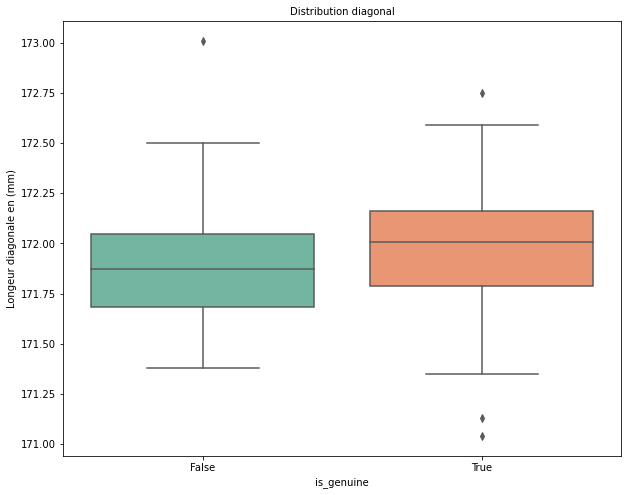

In [16]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="diagonal", data=notes,  palette="Set2").set_title('Distribution diagonal', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Longeur diagonale en (mm)", size=10)

In [17]:
#Test ANOVA
#diagonal = quantitative
#is_genuine = qualitative
import statsmodels.formula.api
import statsmodels.api

fit = statsmodels.formula.api.ols('diagonal ~ is_genuine', data = notes).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,0.306264,0.306264,3.320728,0.07019
Residual,168.0,15.494278,0.092228,NaN,NaN


Analyse 
 - Boxplot : Les médianes des 2 diagonales sont quasi identiques

Text(0, 0.5, 'Length en (mm)')

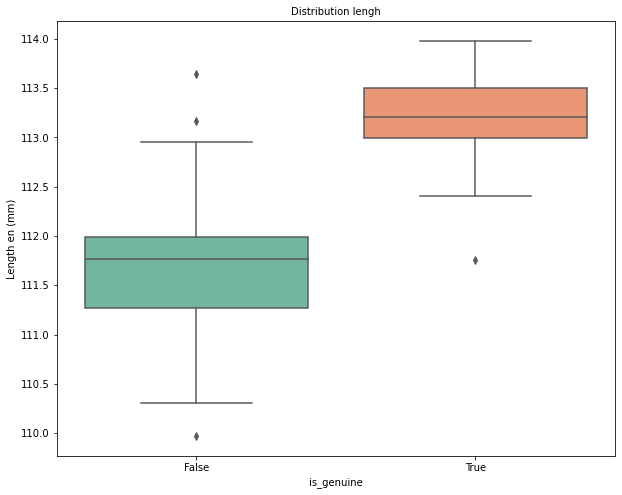

In [18]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="length", data=notes,  palette="Set2").set_title('Distribution lengh', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Length en (mm)", size=10)

Analyse : Pour les vrais billets, la médiane de la variable length est plus élevée

Text(0, 0.5, 'Height_left (en mm)')

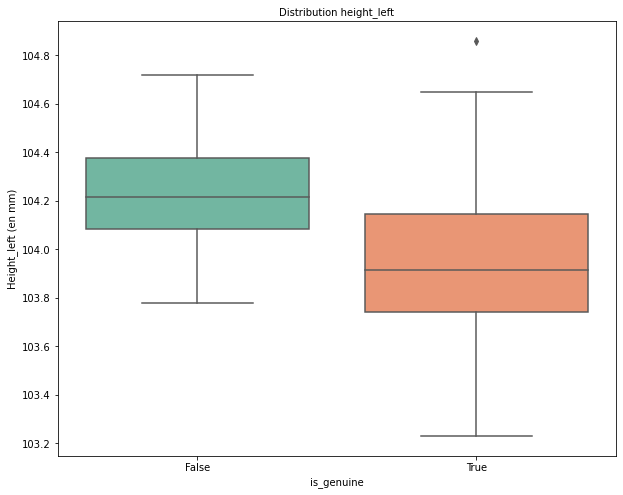

In [19]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="height_left", data=notes,  palette="Set2").set_title('Distribution height_left', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Height_left (en mm)", size=10)

In [20]:
fit = statsmodels.formula.api.ols('height_left ~ is_genuine', data = notes).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,3.203577,3.203577,45.521662,2.334200e-10
Residual,168.0,11.822962,0.070375,NaN,NaN


Analyse : Pour les faux billets, la médiane de la variable height left est plus élevée

Text(0, 0.5, 'Height_right (en mm)')

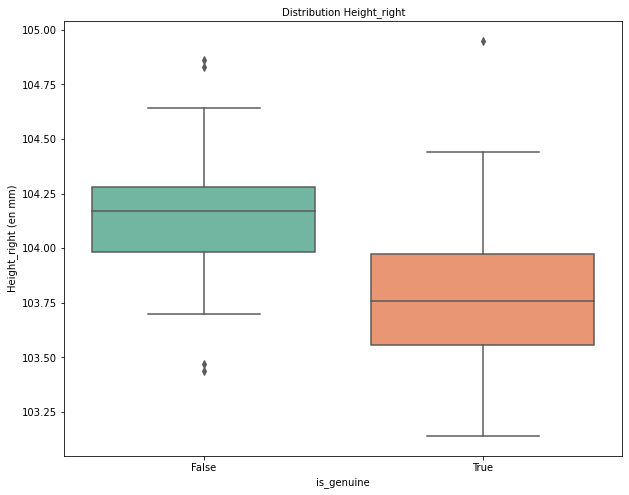

In [21]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="height_right", data=notes,  palette="Set2").set_title('Distribution Height_right', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Height_right (en mm)", size=10)

In [22]:
fit = statsmodels.formula.api.ols('height_right ~ is_genuine', data = notes).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,5.627052,5.627052,73.35904,6.665246e-15
Residual,168.0,12.886546,0.076706,NaN,NaN


Analyse: Pour les faux billets, la médiane de la variable height right est plus élevée

Text(0, 0.5, 'Margin_low (mm)')

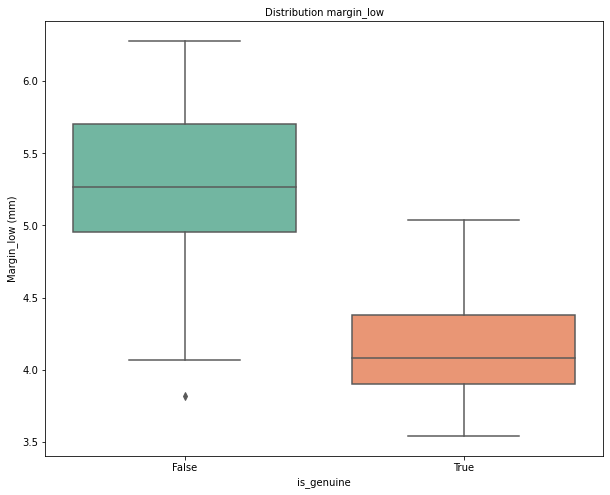

In [23]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="margin_low", data=notes,  palette="Set2").set_title('Distribution margin_low', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Margin_low (mm)", size=10)

In [24]:
fit = statsmodels.formula.api.ols('margin_low ~ is_genuine', data = notes).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,53.332036,53.332036,298.896502,3.940145e-39
Residual,168.0,29.976202,0.178430,NaN,NaN


Analyse : pour les faux billets, la médiane de la variable Margin low est significativement plus élevée

Text(0, 0.5, 'Margin_up (mm)')

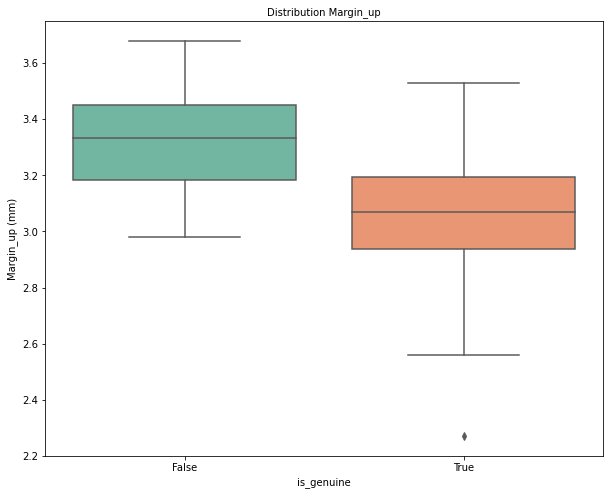

In [25]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="is_genuine", y="margin_up", data=notes,  palette="Set2").set_title('Distribution Margin_up', size=10)
plt.xlabel("is_genuine", size=10)
plt.ylabel("Margin_up (mm)", size=10)

In [26]:
fit = statsmodels.formula.api.ols('margin_up ~ is_genuine', data = notes).fit()
table = statsmodels.api.stats.anova_lm(fit)
table

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,3.206859,3.206859,86.413125,7.567386e-17
Residual,168.0,6.234612,0.037111,NaN,NaN


Analyse : pour les faux billets, la médiane de la variable Margin up est plus élevée

### Conclusion: la marge inférieure et la longueur permettent de determiner si le billet est vrai ou faux.

# II - Mission I : ANALYSE EN COMPOSANTES PRINCIPALES - ACP

- https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis

In [27]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [28]:
# choix du nombre de composantes à calculer
n_comp = 5

# import de l'échantillon
data_pca = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour l'ACP
X = data_pca.values 
names = data_pca.index # ou data.index pour avoir les intitulés
features = data_pca.columns

In [29]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X) #mettre même echelle
X_scaled = std_scale.transform(X)

# Save object to dataframe
scaled_x_df = pd.DataFrame(X_scaled,columns=features)
scaled_x_df.tail()

,diagonal,height_left,height_right,margin_low,margin_up,length
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892
169,0.063673,-0.223180,0.066309,1.454046,0.380151,-1.747172


In [30]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(scaled_x_df)

PCA(n_components=5)

In [31]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

# Les 2 premières composantes expliquent 69,39% de la variance de notre echantillon

Explained variation per principal component: [0.47447921 0.21957106 0.14234524 0.08526295 0.04612822]


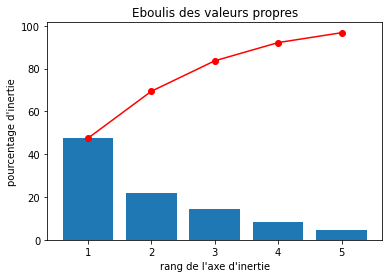

In [32]:
# Eboulis des valeurs propres
display_scree_plot(pca)

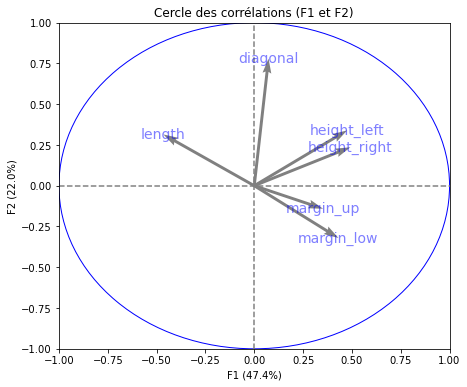

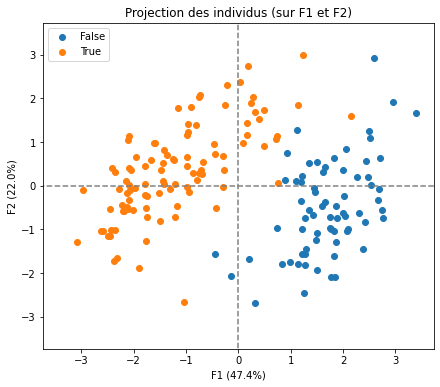

In [33]:

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=notes['is_genuine'])
plt.show()

#### Analyse 
- PC1: est influencé positivement par hight left et hight right 
- PC2 : est influencé par la diagonale

In [34]:
#http://eric.univ-lyon2.fr/~ricco/cours/slides/regression_logistique.pdf
#http://eric.univ-lyon2.fr/~ricco/cours/slides/classif_centres_mobiles.pdf

## III - Mission 2 : APPLIQUER UN ALGORITHME DE CLASSIFICATION, PUIS ANALYSER LE RESULTAT OBTENU.

- Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la

## KMEANS

- Algorithme de classification non supervisée
- Détermine pour un nombre de classes fixé, une répartition des points qui minimise un critère appelé inertie ou variance intra-classe
- Objectif : minimiser l’inertie intra-classes W, à un nombre de classes K fixé.

Principe : 
- pour identifier le nombre de classes, faire varier K et surveiller l’évolution de l’inertie intra-classes SSE. 
- visualiser le « coude » où l’adjonction d’une classe ne correspond à rien dans la structuration des données.
- inertie intra-classes SSE est la somme des distances entre chaque centroid d’un cluster et les différentes observations inclues dans le même cluster. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

## Choisir le nombre de cluster 

In [36]:
#n_initint, default=10 : Nombre de fois que l'algorithme k-means sera exécuté avec différentes graines de centroïdes
#random_stateint, RandomState instance or None, default=None , Determines random number generation for centroid initialization. Use an int to make the randomness deterministic

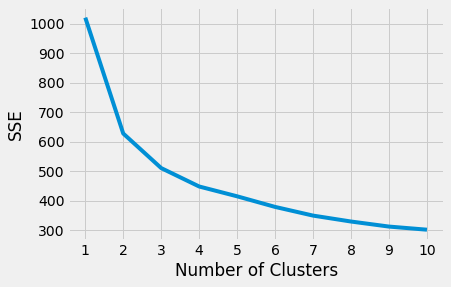

In [37]:

kmeans_kwargs = {
"init": "random",
    "n_init": 10, #algorithme k-means sera exécuté dix fois sur données 8 
   "max_iter": 300, #avec un maximum de 300 itérations par exécution 
   "random_state": 42,}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    # Boucle pour executer kmeans avec 1 clusters, puis 2,3 etc jusqu'a 11
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_x_df)
    
    # Enregistre inertie pour chaque execution ce qui nous permet de choisir le nombre optimal de clusters
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
#Determiner le nombre optimum de cluster 
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

La partition en K = 3 classes est la dernière à induire un gain informationnel significatif.

## Kmeans avec 3 clusters

In [39]:
# Nombre de clusters souhaités
n_clust = 3

# import de l'échantillon
data = notes[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']]

# préparation des données pour le clustering
X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X) #mettre meme echelle
X_scaled = std_scale.transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

In [40]:
# The lowest SSE value
km.inertia_

510.10623604842505

In [41]:
# The number of iterations required to converge
km.n_iter_

14

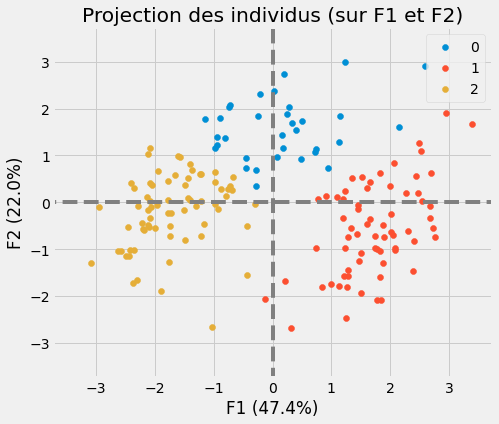

In [42]:
display_factorial_planes(X_projected, n_comp, pca, [(0,1)],  illustrative_var= np.array(clusters))
plt.show()

## Matrice de confusion 

Confusion Matrix (matrice de confusion) ou tableau de contingence est un outil permettant de mesurer les performances d’un modèle de Machine Learning en vérifiant notamment à quelle fréquence ses prédictions sont exactes par rapport à la réalité dans des problèmes de classification.

Interprétation: 
- TP (True Positives) : les cas où la prédiction est positive, et où la valeur réelle est effectivement positive. Exemple : le médecin vous annonce que vous êtes enceinte, et vous êtes bel et bien enceinte.

- TN (True Negatives) : les cas où la prédiction est négative, et où la valeur réelle est effectivement négative. Exemple : le médecin vous annonce que vous n’êtes pas enceinte, et vous n’êtes effectivement pas enceinte.

- FP (False Positive) : les cas où la prédiction est positive, mais où la valeur réelle est négative. Exemple : le médecin vous annonce que vous êtes enceinte, mais vous n’êtes pas enceinte.

- FN (False Negative) : les cas où la prédiction est négative, mais où la valeur réelle est positive. Exemple : le médecin vous annonce que vous n’êtes pas enceinte, mais vous êtes enceinte.

In [43]:
print("Matrice de confusion")
matrice = pd.crosstab(clusters, notes.is_genuine)
matrice.index = ['Cluster 0','Cluster 1','Cluster 2']
matrice.columns = ['Faux','Vrais']
matrice

Matrice de confusion


,Faux,Vrais
Cluster 0,3,30
Cluster 1,66,1
Cluster 2,1,69


## Caracterisation des clusters

In [44]:
#clusters
notes['cluster'] = clusters
notes.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
1,True,171.67,103.74,103.70,4.01,2.87,113.29,2
2,True,171.83,103.76,103.76,4.40,2.88,113.84,2
3,True,171.80,103.78,103.65,3.73,3.12,113.63,2
4,True,172.05,103.70,103.75,5.04,2.27,113.55,2


In [45]:
# Group by the cluster : permet de caractériser chaque groupe
data_cluster_summary = notes.groupby('cluster').agg({'is_genuine':'mean',
                                                     'diagonal':'mean',
                                                     'height_left':'mean',
                                                     'height_right':'mean',
                                                     'margin_low':'mean',
                                                     'margin_up':'mean',
                                                     'length':'mean',
                                                    })
data_cluster_summary.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,,
0,0.909091,172.290606,104.296364,104.042424,4.243030,3.127576,112.964545
1,0.014925,171.861642,104.230746,104.156866,5.300597,3.339104,111.670299
2,0.985714,171.851143,103.800571,103.655286,4.127143,3.029143,113.246143


- Cluster 0 : 90% des billets sont des vrais billets 
- Cluster 1 : 99% des billets sont des faux billets 
- Cluster 2 : 98% des billets sont des vrais billet

==> Tendance grace caracterisation des cluster : 
Lorsque Margin Low est de 5 et Lenght < 112: les billets ont tendance à etre des faux billets 

## IV - MISSION 3 : Modélisez les données à l'aide d'une régression logistique. 

https://ichi.pro/fr/construire-une-regression-logistique-en-python-etape-par-etape-209788975106504

http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/wines_color.html

- créerez un programme capable d'effectuer une prédiction sur un billet : déterminer s'il s'agit d'un vrai ou d'un faux billet. 
- Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux

In [46]:
#Import librairie 
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [47]:
#Créer modèle de regression logistique 
X = notes.drop(['is_genuine', 'cluster'], axis=1) #variables explicatives
y = notes.is_genuine.astype(int) # variable cible, à predire 

# separer la population 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [48]:
#Mesurer le taux de prédiction, le % de billet de bonnes prédictions
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [49]:
#Matrice de confusion, permet d'evaluer comment le modèle predit 
pd.crosstab(y_test, y_pred)

col_0,0,1
is_genuine,,
0,23,0
1,0,28


## ROC Curve
- Receiver operating characteristic curve
- montre la performance d'un modèle de classification à tous les seuils de classification. 
- Cette courbe trace deux paramètres : Taux de vrais positifs et Taux de faux positifs
- aire sous la courbe ROC, mesure la totalité de la zone bidimensionnelle située sous la courbe ROC (pensez au calcul intégral) de (0,0) à (1,1)

In [50]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

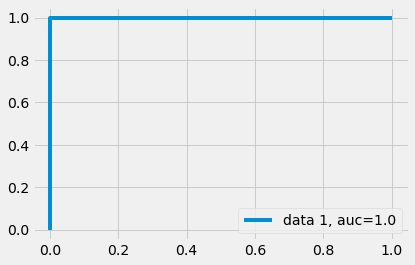

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Analyse :  Le seuil correspondant
• au point le plus proche de l’idéal (1;1) • au point le plus loin de la diagonale

## Sauvegarde du modele

In [52]:
# save the model to disk
import pickle
filename = '../model/model_logreg_detection_billets.sav'
pickle.dump(logreg, open(filename, 'wb'))

# V - Mission 4 : Test du programme avec le jeu de test donné 

## Creation d'une fonction pour executer modele sur test

In [53]:
def detection_faux_billets(path_dataset_to_test):
    
    #grace au path_dataset_to_test on load la data frame pour executer le modèle
    dataset_to_test = pd.read_csv(path_dataset_to_test)
    
    #on selectionne les 6 colonnes pour executer le modèle
    dataset_to_test = dataset_to_test[[
                        'diagonal',
                        'height_left',
                        'height_right',
                        'margin_low',
                        'margin_up',
                        'length']]
    
    #on telecharge le modèle entrainé precedemment
    filename = '../model/model_logreg_detection_billets.sav'
    logreg = pickle.load(open(filename, 'rb'))

    #on execute le modele sur df loader sur la fonction
    dataset_to_test['prediction'] = logreg.predict(dataset_to_test)
    dataset_to_test['prediction'] = np.where(dataset_to_test['prediction']==0,'Faux','Vrai')
    
    return dataset_to_test

In [54]:
prediction_df = detection_faux_billets("../Data/example.csv")
prediction_df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
0,171.76,104.01,103.54,5.21,3.30,111.42,Faux
1,171.87,104.17,104.13,6.00,3.31,112.09,Faux
2,172.00,104.58,104.29,4.99,3.39,111.57,Faux
3,172.49,104.55,104.34,4.44,3.03,113.20,Vrai
4,171.65,103.63,103.56,3.77,3.16,113.33,Vrai


In [59]:
prediction_df = detection_faux_billets("../Data/test_notes_DA.csv")
prediction_df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction
0,172.09,103.95,103.73,4.39,3.09,113.19,Vrai
1,171.52,104.17,104.03,5.27,3.16,111.82,Faux
2,171.78,103.80,103.75,3.81,3.24,113.39,Vrai
3,172.02,104.08,103.99,5.57,3.30,111.10,Faux
4,171.79,104.34,104.37,5.00,3.07,111.87,Faux


In [55]:
###################################################################################################################

In [56]:
#Les données de test représentent 30% de l'ensemble des données originales, comme spécifié avec le paramètre test_size = 0.1
#PRCT_TEST = 0.1
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRCT_TEST, random_state=0)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

In [57]:
#import statsmodels.formula.api as smf
#import statsmodels.api as sm

In [58]:
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
#import statsmodels.api as sm

#X = notes.drop(['is_genuine'], axis=1)
#y = notes.is_genuine.astype(int)
#logit_model = sm.Logit(y, X)
#result=logit_model.fit(method='bfgs')
#print(result.summary2())